<a href="https://colab.research.google.com/github/David-Arciniegas/Prueba-02-metodos-/blob/main/Ejercicio_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np
def gauss_jacobi(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> tuple:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    ``trajectory``: Lista de vectores que representa la trayectoria de la aproximación.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-n."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    trajectory = [x.copy()]

    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            suma = np.sum(A[i, :i] * x[:i]) + np.sum(A[i, i+1:] * x[i+1:])
            x_new[i] = (b[i] - suma) / A[i, i]

        # Verificar convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, trajectory

        x = x_new
        trajectory.append(x.copy())
        logging.info(f"Iteración {k}: {x}")

    return x, trajectory

# ####################################################################
def gauss_seidel(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> tuple:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    ``trajectory``: Lista de vectores que representa la trayectoria de la aproximación.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-n."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    trajectory = [x.copy()]

    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = np.sum(A[i, :i] * x_new[:i]) + np.sum(A[i, i+1:] * x[i+1:])
            x_new[i] = (b[i] - suma) / A[i, i]

        # Verificar convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, trajectory

        x = x_new
        trajectory.append(x.copy())
        logging.info(f"Iteración {k}: {x}")

    return x, trajectory

def eliminacion_gaussiana(A: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    ``A``: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

        print(f"\n{A}")
    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, n] - suma) / A[i, i]

    return solucion

def matriz_aumentada(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Construye la matriz aumentada de un sistema de ecuaciones lineales.

    ## Parameters

    ``A``: matriz de coeficientes.

    ``b``: vector de términos independientes.

    ## Return

    ``a``:

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert A.shape[0] == b.shape[0], "Las dimensiones de A y b no coinciden."
    return np.hstack((A, b.reshape(-1, 1)))





In [ ]:
A = [[1, 1], [-2, 5]]
b = [7, 0]
eliminacion_gaussiana(matriz_aumentada(A, b))

In [ ]:
A = [[1, 1], [-2, 5]]
b = [7, 0]
n = len(A)

gauss_jacobi(A=A, b=b, x0=[0]*n, tol=1e-5, max_iter=1000)

Solución Gauss-Jacobi: [5.00000429 2.00000107]


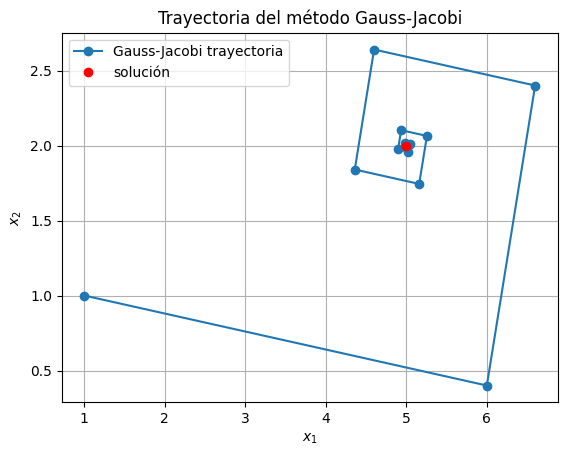

Solución Gauss-Seidel: [5 2]


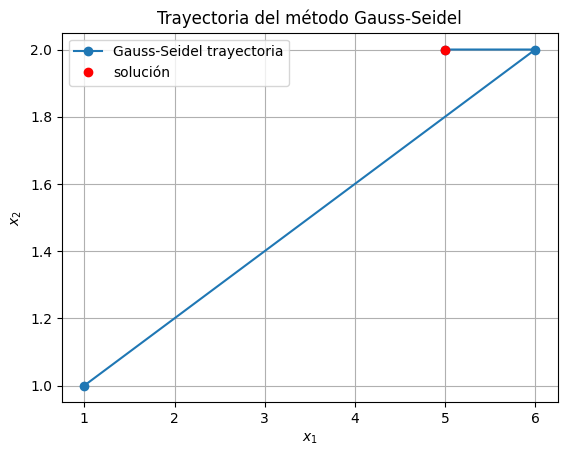

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def plot_trajectory(trajectory, solution, method):
    # Imprimir la forma de cada elemento en la trayectoria


    # Asegurarse de que cada elemento en la trayectoria sea un vector de dos elementos
    trajectory = [np.array(t) for t in trajectory if len(t) == 2]

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', label=f'{method} trayectoria')
    plt.plot(solution[0], solution[1], 'ro', label='solución')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.grid()
    plt.title(f'Trayectoria del método {method}')
    plt.show()

# Sistema de ecuaciones 1
A1 = np.array([[1, 1], [-2, 5]])
b1 = np.array([7, 0])
x0 = np.array([1, 1])

# Gauss-Jacobi
solution_jacobi, trajectory_jacobi = gauss_jacobi(A=A1, b=b1, x0=x0, tol=1e-5, max_iter=50)
print(f'Solución Gauss-Jacobi: {solution_jacobi}')
plot_trajectory(trajectory_jacobi, solution_jacobi, 'Gauss-Jacobi')

# Gauss-Seidel
solution_seidel, trajectory_seidel = gauss_seidel(A=A1, b=b1, x0=x0, tol=1e-5, max_iter=50)
print(f'Solución Gauss-Seidel: {solution_seidel}')
plot_trajectory(trajectory_seidel, solution_seidel, 'Gauss-Seidel')



Solución Gauss-Jacobi: [-5.49755814e+11  5.49755814e+11]


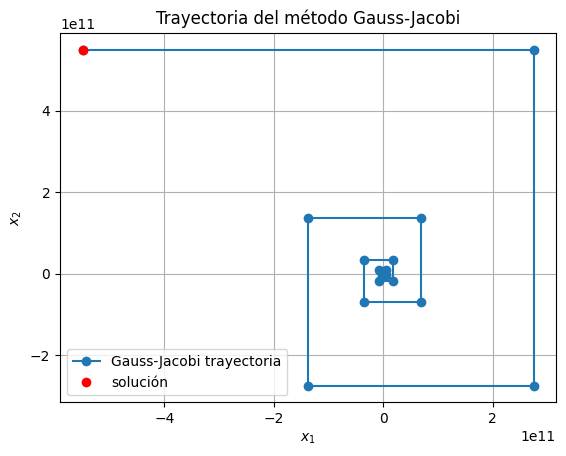

Solución Gauss-Seidel: [-2251799813685246 -4503599627370492]


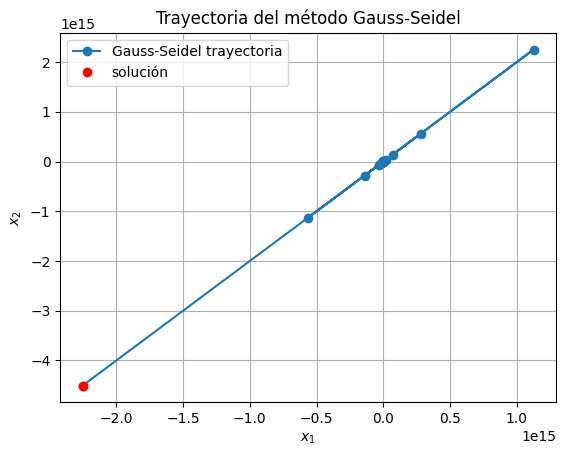

In [28]:

import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np
import matplotlib.pyplot as plt

# Definir los métodos iterativos
def gauss_jacobi(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> tuple:
    n = A.shape[0]
    x = x0.copy()
    trajectory = [x.copy()]

    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            suma = np.sum(A[i, :i] * x[:i]) + np.sum(A[i, i+1:] * x[i+1:])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, trajectory

        x = x_new
        trajectory.append(x.copy())
        logging.info(f"Iteración {k}: {x}")

    return x, trajectory

def gauss_seidel(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> tuple:
    n = A.shape[0]
    x = x0.copy()
    trajectory = [x.copy()]

    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = np.sum(A[i, :i] * x_new[:i]) + np.sum(A[i, i+1:] * x[i+1:])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, trajectory

        x = x_new
        trajectory.append(x.copy())
        logging.info(f"Iteración {k}: {x}")

    return x, trajectory

# Función para graficar la trayectoria
def plot_trajectory(trajectory, solution, method):
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', label=f'{method} trayectoria')
    plt.plot(solution[0], solution[1], 'ro', label='solución')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.grid()
    plt.title(f'Trayectoria del método {method}')
    plt.show()

# Definir el sistema de ecuaciones
A = np.array([[1, 1], [-2, 1]])
b = np.array([6, 0])
x0 = np.array([0, 0])

# Gauss-Jacobi
solution_jacobi, trajectory_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=1e-5, max_iter=75)
print(f'Solución Gauss-Jacobi: {solution_jacobi}')
plot_trajectory(trajectory_jacobi, solution_jacobi, 'Gauss-Jacobi')

# Gauss-Seidel
solution_seidel, trajectory_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=1e-5, max_iter=50)
print(f'Solución Gauss-Seidel: {solution_seidel}')
plot_trajectory(trajectory_seidel, solution_seidel, 'Gauss-Seidel')
